# Popular Data Science Questions
## An analysis of Data Science Stack Exchange

## Executive Summary
This project utilized publicly available data from Data Science Stack Exchange to evaluate trends in data science topics. The analysis showed that interest in machine learning is decreasing, while interest in deep learning is increasing.

The analysis also indicated that the field is utilizing Data Science Stack Exchange less over time.

## Introduction
Data Scientists are continuously generating new techniques and methodologies. This evolution requires data scientists to quickly and effectively integrate new knowledge into their workstreams. However, we often run into debugging, logistical, or theoretical problems which we are unable to solve on our own. When this occurs, we turn to others for help. One outlet for seeking that help is a [collection of websites called Stack Exchange](https://stackexchange.com/sites?view=grid#). These websites are crowd-sourced Q&A forums for a [wide](https://photo.stackexchange.com/) [variety](https://math.stackexchange.com/) [of](https://bricks.stackexchange.com/) [topics](https://rpg.stackexchange.com/). 

[Data Science has its own Stack Exchange](https://datascience.stackexchange.com/), and it is used as a resource for data scientists to ask questions about their projects, code, or concepts. **We can use the posts in Data Science Stack Exchange (DSSE) to identify trends in the field** for two reasons:
1. The website has been in regular use for the past 7 years.
2. New and challenging concepts are most likely to generate questions on the site.

## Methodology
To identify trends on DSSE, I needed a way to identify the core topic(s) of each post. The most straightforward method to achieve this was to use **tags**. The posting interface on DSSE explains tags in the following manner:

> Tags help the right people find and answer your question.
>
> * Identify your tags by completing the sentence, "My question is about…"
>
> * Include tags that are crucial to your question only
>
> * Use existing popular tags

By definition, these tags are an easily accessible method by which to gauge post topic.

### Data Acquisition
Using the [SQL Query interface provided on DSSE's website](https://data.stackexchange.com/datascience/query/new), I gathered a *.csv* file containing the data for this analysis.

The following SQL query was used to obtain the data subset:
```
SELECT *
  FROM Posts
 WHERE PostTypeId = 1
 ORDER BY CreationDate DESC;
 ```
`PostTypeId = 1` identifies the post as a question, rather than an answer or a reply.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

## Data Cleaning

Cleaning these data will consist of the following steps:
1. Dropping unneeded and/or empty columns
2. Extract individual tags from the single string they are formatted into
3. Fill NaN values appropriately

In [2]:
dsse = pd.read_csv('./DataSets/DataScienceStackExchange/210905DataScienceStackExchangeQuestions.csv',
                   parse_dates = ['CreationDate'])

# Drop unneeded columns
dsse.drop(labels = ['ParentId', 'DeletionDate', 'OwnerDisplayName', 'LastEditorDisplayName',
                    'ClosedDate', 'CommunityOwnedDate', 'ContentLicense', 'PostTypeId',
                    'LastEditDate', 'LastEditorUserId', 'LastActivityDate'],
          axis = 1,
          inplace = True)

dsse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                30336 non-null  int64         
 1   AcceptedAnswerId  10155 non-null  float64       
 2   CreationDate      30336 non-null  datetime64[ns]
 3   Score             30336 non-null  int64         
 4   ViewCount         30336 non-null  int64         
 5   Body              30336 non-null  object        
 6   OwnerUserId       30144 non-null  float64       
 7   Title             30336 non-null  object        
 8   Tags              30336 non-null  object        
 9   AnswerCount       30336 non-null  int64         
 10  CommentCount      30336 non-null  int64         
 11  FavoriteCount     8073 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.8+ MB


In [3]:
# Extract the individual tags from a string of format '<tag1a-tag1b><tag2a-tag2b>...<tagNa-tagNb>'
dsse['Tags'] = dsse['Tags'].apply(lambda s: re.findall(r'([^<>]+)',s))

In [4]:
dsse['FavoriteCount'] = dsse['FavoriteCount'].fillna(0).astype(int)

In [5]:
dsse['Tags']

0                        [apache-hadoop, data-table, hive]
1                                          [python, keras]
2        [scikit-learn, regression, data-cleaning, cate...
3                                            [data-mining]
4                [deep-learning, scikit-learn, tensorflow]
                               ...                        
30331                  [machine-learning, bigdata, libsvm]
30332                                          [databases]
30333                           [data-mining, definitions]
30334                             [education, open-source]
30335                                   [machine-learning]
Name: Tags, Length: 30336, dtype: object

## Analysis
### Tag prevalence and views over time
By tracking the relative prevalence of tags, as well as the number of times each tag is viewed, we can measure the relative popularity of different topics in data science over the past 7 years.

In [6]:
# Count the frequency of tags in the dataset by year
years_of_interest = range(2014,2022)
tag_prevalence_raw = pd.DataFrame(columns = years_of_interest)
tag_views_raw =      pd.DataFrame(columns = years_of_interest)

for i in range(dsse.shape[0]):
    row = dsse.loc[i,:]
    row_tags = row['Tags']
    question_year = row['CreationDate'].year
    question_views = row['ViewCount']
    
    for tag in row_tags:
        if (tag in tag_prevalence_raw.index):
            tag_prevalence_raw.loc[tag, question_year] = tag_prevalence_raw.loc[tag, question_year] + 1
        else:
            tag_prevalence_raw.loc[tag, years_of_interest] = 0
            
        if (tag in tag_views_raw.index):
            tag_views_raw.loc[tag, question_year] = tag_views_raw.loc[tag, question_year] + question_views
        else:
            tag_views_raw.loc[tag, years_of_interest] = 0

In [7]:
# Post-processing of prevalence data to select top tags and calculate tag frequencies instead
#     of absolute number of tags.
tag_prevalence = tag_prevalence_raw.sort_values(2021, ascending = False)
total_tags = tag_prevalence_raw[years_of_interest].sum()
tag_prevalence = (tag_prevalence / total_tags).astype(float).round(3)
top_tag_prevalence = tag_prevalence.iloc[:4,:]
top_tag_prevalence = top_tag_prevalence.reset_index()

print(f'Fraction of questions including a given tag by year')
print(f'---------------------------------------------------')
top_tag_prevalence

Fraction of questions including a given tag by year
---------------------------------------------------


,index,2014,2015,2016,2017,2018,2019,2020,2021
0,machine-learning,0.122,0.137,0.111,0.118,0.114,0.104,0.093,0.089
1,python,0.031,0.045,0.053,0.056,0.065,0.070,0.059,0.060
2,deep-learning,0.006,0.010,0.027,0.050,0.055,0.044,0.044,0.050
3,neural-network,0.019,0.033,0.047,0.057,0.057,0.040,0.035,0.031


In [8]:
# Post-processing of view data to select top tags and normalize them to the number of views
#     asked each year.
tag_views = tag_views_raw.sort_values(2021, ascending = False)
total_views = tag_views_raw[years_of_interest].sum()
tag_views = (tag_views / total_views).astype(float).round(3)
top_tag_views = tag_views.iloc[:4,:]
top_tag_views = top_tag_views.reset_index()

print(f'Fraction of views of a question including a given tag by year')
print(f'-------------------------------------------------------------')
top_tag_views

Fraction of views of a question including a given tag by year
-------------------------------------------------------------


,index,2014,2015,2016,2017,2018,2019,2020,2021
0,python,0.060,0.071,0.100,0.096,0.125,0.116,0.083,0.087
1,machine-learning,0.127,0.114,0.087,0.113,0.097,0.077,0.075,0.069
2,deep-learning,0.019,0.013,0.057,0.065,0.048,0.044,0.034,0.042
3,keras,0.000,0.001,0.034,0.030,0.046,0.049,0.051,0.040


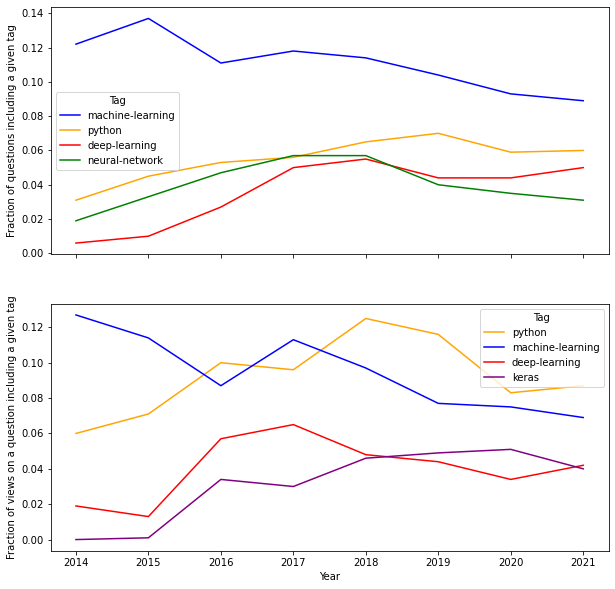

In [9]:
# Prepare data for plotting and plot
top_tag_prevalence_melt = top_tag_prevalence.melt(id_vars = ['index'],
                                                 value_vars = years_of_interest)
top_tag_prevalence_melt.columns = ['Tag', 'Year', 'value']

top_tag_views_melt = top_tag_views.melt(id_vars = ['index'],
                                        value_vars = years_of_interest)
top_tag_views_melt.columns = ['Tag', 'Year', 'value']


# Plotting code
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.lineplot(data = top_tag_prevalence_melt,
             x = 'Year',
             y = 'value',
             hue = 'Tag',
             palette = ['blue','orange','red','green'],
             ax = ax1)
ax1.set(ylabel = 'Fraction of questions including a given tag')

sns.lineplot(data = top_tag_views_melt,
             x = 'Year',
             y = 'value',
             hue = 'Tag',
             palette = ['orange','blue','red','purple'],
             ax = ax2)
ax2 = ax2.set(ylabel = 'Fraction of views on a question including a given tag')

The plots above show (top) the fraction of all questions in a year that are tagged with one of the top four 2021 tags and (bottom) the fraction of all views that are on a question with a given tag by year.

With respect to **tag prevalence** (top graph), we can make the following observations:
* Absolute tag frequency
    * **Machine learning** is consistently the **most asked about topic on DSSE**.
    * The fraction of questions tagged with **neural-network** peaked in 2017.
* Relative tag frequency
    * **Deep learning** had **very few posts in 2014,** but **in 2021, it was assigned to 5% of questions**.
    * **Python** has consistently been the second most frequent tag after *machine-learning*

<br/><br/>
With respect to **view fraction** (bottom graph), we can make the following observations:
* Absolute view fraction
    * Of the most viewed tags in 2021, **machine learning** was the **most viewed in 2014**, but it has since dropped in view fraction.
    * The fraction of all views on **deep learning peaked in 2017**.
* Relative view fraction
    * **Deep learning** and Python's deep learning API **Keras**, have increased in view fraction since 2014.

### Overall activity on DSSE

Taking the **two plots together**, we can gain additional insight. Quantitatively, we can divide the number of times a tag was used by the number of views on posts with a given tag.This should give a better metric of community interest than the raw numbers alone.

To avoid skewing the results with low-view or low-post tags, I only analyzed the four most prevalent tags in 2021 - 'machine-learning', 'python', 'deep-learning', and 'neural-network'.

In [10]:
# Calculate the 'views per post'
top_4_tags = ['machine-learning', 'python', 'deep-learning', 'neural-network']
top_4_prevalence_raw = tag_prevalence_raw.loc[top_4_tags, :]
top_4_views_raw = tag_views_raw.loc[top_4_tags, :]

top_4_views_per_tag_use = (top_4_views_raw / top_4_prevalence_raw).astype(int)
print(f'Number of views per post with a given tag')
print(f'-----------------------------------------')
top_4_views_per_tag_use

Number of views per post with a given tag
-----------------------------------------


,2014,2015,2016,2017,2018,2019,2020,2021
machine-learning,7387,4073,4043,3431,2284,800,274,44
python,13896,7655,9812,6134,5162,1798,482,83
deep-learning,23338,6314,11116,4656,2335,1088,265,48
neural-network,12462,6855,6150,3798,2221,1041,274,41


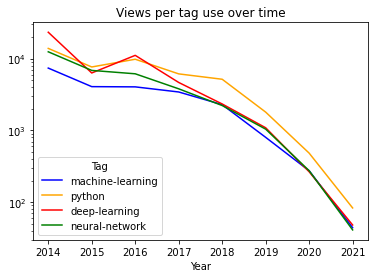

In [11]:
top_4_views_per_tag_use_melt = top_4_views_per_tag_use.reset_index().melt(id_vars = ['index'],
                                                                          value_vars = years_of_interest)
top_4_views_per_tag_use_melt.columns = ['Tag', 'Year', 'value']

fig3 = sns.lineplot(data = top_4_views_per_tag_use_melt,
                    x = 'Year',
                    y = 'value',
                    hue = 'Tag',
                    palette = ['blue','orange','red','green'])

fig3 = fig3.set(ylabel = '',
                title = 'Views per tag use over time',
                yscale = 'log')

This plot paints a very different picture than the previous plots. For a start, **'deep learning'**, which **had the fewest tag uses** at the beginning of DSSE, **had - *by far* - the highest number of views per post**. This indicates that it was an intensely popular topic in 2014. The explanation for this might be that **deep learning was in its infancy in 2014**. It was accessible to only a few, yet intensely interesting to everyone in the field. Wikipedia's history of deep learning suggests this as well, where it mentions a ['deep learning revolution'](https://en.wikipedia.org/wiki/Deep_learning#Deep_learning_revolution) that started in 2012.

The immediately obvious trend on this graph is that there is a **sharp decline in views per any tag** over time. Three possible explanations for this are:
1. The number of questions is expanding more quickly than the number of interested viewers
2. The number of interested viewers is decreasing.
3. The number of tags per post is decreasing.

To check which of these is the case, we can simply plot the raw post and view numbers over time.

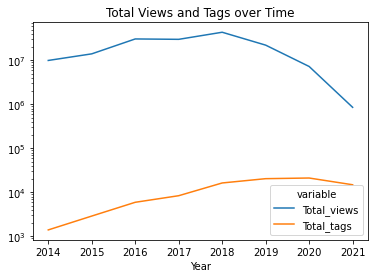

In [12]:
totals_plot = pd.DataFrame({'Total_views':total_views, 'Total_tags':total_tags}).reset_index()
totals_plot_melt = totals_plot.melt(id_vars = 'index',
                                    value_vars = ['Total_views', 'Total_tags'])

totals_plot_melt['value'] = totals_plot_melt['value'].astype(float)


fig4 = sns.lineplot(data = totals_plot_melt,
                    x = 'index',
                    y = 'value',
                    hue = 'variable')
fig4 = fig4.set(yscale = 'log',
                xlabel = 'Year',
                ylabel = '',
                title = 'Total Views and Tags over Time')

It is important to note that the data for 2021 is incomplete, so the final point on the curve will increase by the end of the year.

Overall, this data points towards a shift away from DSSE's use.

## Conclusion
In this project, I pulled a list of all the questions asked on Data Science Stack Exchange (DSSE) from the [DSSE data explorer](https://data.stackexchange.com/datascience/query/new) and analyzed the data using tags and views as proxies for interest in topics in the field over time. The analysis showed:
* *Machine learning* is consistently *the most-tagged topic*.
* The *deep learning tag is growing*, while *machine learning is shrinking.*
* The *number of views per tag in 2014 was highest for deep-learning*, suggesting that although there were a small number of posts in 2014, they were massively popular.
* The number of tags used and the number of views on tags is decreasing over time. This could signal a *decrease in total activity on DSSE.*